In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

In [21]:
df_censo = pd.read_csv('database/Cantidad-de-Personas-por-Sexo-y-Edad.csv', sep=";")
df_farmacias = pd.read_csv("database/2.-Farmacias-Chile-07.2023.csv", sep=";", encoding="utf-8")
#df_hospitales = pd.read_excel("database/Establecimientos_ChileDEIS_MINSAL 03-11-2023.xlsx", sheet_name="Establecimientos Vigentes")

def modificar_nombre_columna(nombre: str):
    nombre = nombre.strip()  
    nombre = nombre.lower() 
    nombre = nombre.replace(" ", "_")
    nombre = nombre.replace("\xa0", "_") 
    return nombre

nuevos_nombres = {columna: modificar_nombre_columna(columna) for columna in df_censo.columns}
df_censo.rename(columns=nuevos_nombres, inplace=True)
df_censo.columns

df_censo["código_región"] = pd.to_numeric(df_censo["código_región"], errors="coerce")
df_censo["código_provincia"] = pd.to_numeric(df_censo["código_provincia"], errors="coerce")
df_censo["código_comuna"] = pd.to_numeric(df_censo["código_comuna"], errors="coerce")
df_censo["edad"] = df_censo["edad"].astype("category")
df_censo["hombres"] = df_censo["hombres"].str.replace(".", "").astype("int")
df_censo["mujeres"] = df_censo["mujeres"].str.replace(".", "").astype("int")
df_censo["total"] = df_censo["total"].str.replace(".", "").astype("int")

In [ ]:
df_hospitales.columns = df_hospitales.loc[0,:]
df_hospitales.drop(0, inplace=True)
df_hospitales.drop(columns=["Código Antiguo ", "Código  Madre Antiguo", "Código Madre Nuevo", "Código  Madre Antiguo", "Fecha de Incorporación a la base o cambios", "Teléfono", "Fecha Inicio Funcionamiento", "Vía", "Certificación ", "Número", "Dirección", "Clasificcion Tipo de SAPU", "Dependencia Administrativa"], inplace=True)

In [ ]:
df_hospitales.replace(["No Aplica", "Pendiente", "Completar", "No Aplica", "Por confirmar", "no Aplica", "Pendiente", "no aplica", "No Aplica"], np.NaN, inplace=True)

df_hospitales["Código Vigente"] = df_hospitales["Código Vigente"].astype("int")

df_hospitales["Código Región"] = df_hospitales["Código Región"].astype("int")

df_hospitales["Código Dependencia Jerárquica (SEREMI / Servicio de Salud)"] = df_hospitales["Código Dependencia Jerárquica (SEREMI / Servicio de Salud)"].astype("float")

df_hospitales["Pertenencia al SNSS"] = df_hospitales["Pertenencia al SNSS"].map(lambda x: x == 'Perteneciente' or x == True)
df_hospitales["Pertenencia al SNSS"] = df_hospitales["Pertenencia al SNSS"].astype("bool")

df_hospitales["Nivel de Atención"] = df_hospitales["Nivel de Atención"].astype("category")

df_hospitales["Tiene Servicio de Urgencia"] = df_hospitales["Tiene Servicio de Urgencia"].map(lambda x: x == 'SI' or x == True)
df_hospitales["Tiene Servicio de Urgencia"] = df_hospitales["Tiene Servicio de Urgencia"].astype("bool")
df_hospitales["Tipo de Urgencia "] = df_hospitales["Tipo de Urgencia "].astype("category")
df_hospitales["Tipo de Prestador Sistema de Salud"] = df_hospitales["Tipo de Prestador Sistema de Salud"].astype("category")

df_hospitales["Nivel de Complejidad"] = df_hospitales["Nivel de Complejidad"].astype("category")
df_hospitales["Tipo de Atención "] = df_hospitales["Tipo de Atención "].astype("category")

In [ ]:
df_hospitales = df_hospitales[df_hospitales['Estado de Funcionamiento'].str.contains("Vigente", case=False, na=False)]
df_hospitales.drop(columns="Estado de Funcionamiento", inplace=True)

In [ ]:

nuevos_nombres = {columna: modificar_nombre_columna(columna) for columna in df_hospitales.columns}
df_hospitales.rename(columns=nuevos_nombres, inplace=True)
df_hospitales.rename(columns={"latitud______[grados_decimales]": "latitud", "longitud_[grados_decimales]":"longitud"}, inplace=True)
df_hospitales["código_región"] = df_hospitales["código_región"].astype("int")
df_hospitales["código_comuna"] = df_hospitales["código_comuna"].astype("int")
df_hospitales["nombre_comuna"] = df_hospitales["nombre_comuna"].str.upper()
df_hospitales["tipo_establecimiento_(unidad)"] = df_hospitales["tipo_establecimiento_(unidad)"].str.strip()
df_hospitales.info()


In [ ]:
df_hospitales.loc[df_hospitales["nombre_región"] == "Región De los Ríos", "nombre_región"] = "Región De Los Ríos"
df_hospitales.loc[df_hospitales["nombre_comuna"] == "CHILLÁN ", "nombre_comuna"] = "CHILLÁN"
df_hospitales.loc[df_hospitales["nombre_comuna"] == "LICANTEN", "nombre_comuna"] = "LICANTÉN"
df_hospitales.loc[df_hospitales["nombre_comuna"] == "VICHUQUEN", "nombre_comuna"] = "VICHUQUÉN"
df_hospitales.loc[df_hospitales["nombre_comuna"] == "CALERA","nombre_comuna"] = "LA CALERA"
df_hospitales.loc[df_hospitales["nombre_comuna"] == "LAS CONDES", "código_comuna"] = 13114
df_hospitales.loc[df_hospitales["nombre_comuna"] == "LA FLORIDA", "código_comuna"] = 13110


In [22]:
comunas_ñuble = {16109: 'YUNGAY',
 16105: 'PEMUCO',
 16104: 'EL CARMEN',
 16107: 'QUILLÓN',
 16108: 'SAN IGNACIO',
 16106: 'PINTO',
 16102: 'BULNES',
 16302: 'COIHUECO',
 16103: 'CHILLÁN VIEJO',
 16206: 'RÁNQUIL',
 16304: 'SAN FABIÁN',
 16101: 'CHILLÁN',
 16205: 'PORTEZUELO',
 16203: 'COELEMU',
 16305: 'SAN NICOLÁS',
 16301: 'SAN CARLOS',
 16207: 'TREGUACO',
 16204: 'NINHUE',
 16303: 'ÑIQUÉN',
 16201: 'QUIRIHUE',
 16202: 'COBQUECURA'}
comunas_ñuble = {v: k for k, v in comunas_ñuble.items()}


provincias_ñuble = {
    161: "DIGUILLÍN",
    162: "ITATA",
    163: "PUNILLA"
}


In [24]:
d = df_censo[df_censo["nombre_provincia"].str.contains("ÑUBLE")]
d["nombre_comuna"] = d["nombre_comuna"].str.replace(" *", "")
d
d["código_comuna"] = d["nombre_comuna"].map(comunas_ñuble).astype("string")
d["nombre_región"] = "ÑUBLE"
d["código_región"] = 16
d["código_provincia"] = d["código_comuna"].str.slice(0,3)
d["código_provincia"] = d["código_provincia"].astype("int")
d["nombre_provincia"] = d["código_provincia"].map(provincias_ñuble)






C:\Users\Flo\AppData\Local\Temp\ipykernel_14472\771459474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["nombre_comuna"] = d["nombre_comuna"].str.replace(" *", "")
C:\Users\Flo\AppData\Local\Temp\ipykernel_14472\771459474.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["código_comuna"] = d["nombre_comuna"].map(comunas_ñuble).astype("string")
C:\Users\Flo\AppData\Local\Temp\ipykernel_14472\771459474.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [26]:
df_censo.drop(df_censo[df_censo["nombre_provincia"].str.contains("ÑUBLE")].index, inplace=True)
df_censo = pd.concat([df_censo, d], ignore_index=True)
df_censo.sort_values(by="orden", inplace=True)
df_censo["código_comuna"] = df_censo["código_comuna"].astype("float")

In [27]:
codigo_comuna_a_provincia = dict(zip(df_censo['código_comuna'], df_censo['código_provincia']))
codigo_comuna_a_provincia = {int(comuna): int(provincia) for comuna, provincia in codigo_comuna_a_provincia.items() if not pd.isna(comuna)}
#df_hospitales.loc[:, "código_provincia"] = df_hospitales["código_comuna"].map(codigo_comuna_a_provincia)
#df_hospitales["código_provincia"] = df_hospitales["código_provincia"].astype("int")

In [28]:
codigo_comuna_a_region = dict(zip(df_censo['código_comuna'], df_censo['nombre_provincia']))
codigo_comuna_a_region = {int(comuna): str(provincia) for comuna, provincia in codigo_comuna_a_region.items() if not pd.isna(comuna)}
#df_hospitales.loc[:, "nombre_provincia"] = df_hospitales["código_comuna"].map(codigo_comuna_a_region)
#df_hospitales["código_provincia"] = df_hospitales["código_provincia"].astype("int")

In [29]:
nombre_comuna_a_codigo_comuna = {'ARICA': 15101, 'CAMARONES': 15102, 'PUTRE': 15201, 'GENERAL LAGOS': 15202, 'IQUIQUE': 1101, 'ALTO HOSPICIO': 1107, 'POZO ALMONTE': 1401, 'CAMIÑA': 1402, 'CAMINA': 1402, 'COLCHANE': 1403, 'HUARA': 1404, 'PICA': 1405, 'ANTOFAGASTA': 2101, 'MEJILLONES': 2102, 'SIERRA GORDA': 2103, 'TALTAL': 2104, 'CALAMA': 2201, 'OLLAGÜE': 2202, 'OLLAGUE': 2202, 'SAN PEDRO DE ATACAMA': 2203, 'TOCOPILLA': 2301, 'MARÍA ELENA': 2302, 'MARIA ELENA': 2302, 'COPIAPÓ': 3101, 'COPIAPO': 3101, 'CALDERA': 3102, 'TIERRA AMARILLA': 3103, 'CHAÑARAL': 3201, 'CHANARAL': 3201, 'DIEGO DE ALMAGRO': 3202, 'VALLENAR': 3301, 'ALTO DEL CARMEN': 3302, 'FREIRINA': 3303, 'HUASCO': 3304, 'LA SERENA': 4101, 'COQUIMBO': 4102, 'ANDACOLLO': 4103, 'LA HIGUERA': 4104, 'PAIGUANO': 4105, 'VICUÑA': 4106, 'VICUNA': 4106, 'ILLAPEL': 4201, 'CANELA': 4202, 'LOS VILOS': 4203, 'SALAMANCA': 4204, 'OVALLE': 4301, 'COMBARBALÁ': 4302, 'COMBARBALA': 4302, 'MONTE PATRIA': 4303, 'PUNITAQUI': 4304, 'RÍO HURTADO': 4305, 'RIO HURTADO': 4305, 'VALPARAÍSO': 5101, 'VALPARAISO': 5101, 'CASABLANCA': 5102, 'CONCÓN': 5103, 'CONCON': 5103, 'JUAN FERNÁNDEZ': 5104, 'JUAN FERNANDEZ': 5104, 'PUCHUNCAVÍ': 5105, 'PUCHUNCAVI': 5105, 'QUINTERO': 5107, 'VIÑA DEL MAR': 5109, 'VINA DEL MAR': 5109, 'ISLA DE PASCUA': 5201, 'LOS ANDES': 5301, 'CALLE LARGA': 5302, 'RINCONADA': 5303, 'SAN ESTEBAN': 5304, 'LA LIGUA': 5401, 'CABILDO': 5402, 'PAPUDO': 5403, 'PETORCA': 5404, 'ZAPALLAR': 5405, 'QUILLOTA': 5501, 'CALERA': 5502, 'LA CALERA': 5502, 'HIJUELAS': 5503, 'LA CRUZ': 5504, 'NOGALES': 5506, 'SAN ANTONIO': 5601, 'ALGARROBO': 5602, 'CARTAGENA': 5603, 'EL QUISCO': 5604, 'EL TABO': 5605, 'SANTO DOMINGO': 5606, 'SAN FELIPE': 5701, 'CATEMU': 5702, 'LLAILLAY': 5703, 'PANQUEHUE': 5704, 'PUTAENDO': 5705, 'SANTA MARÍA': 5706, 'SANTA MARIA': 5706, 'QUILPUÉ': 5801, 'QUILPUE': 5801, 'LIMACHE': 5802, 'OLMUÉ': 5803, 'OLMUE': 5803, 'VILLA ALEMANA': 5804, 'SANTIAGO': 13101, 'CERRILLOS': 13102, 'CERRO NAVIA': 13103, 'CONCHALÍ': 13104, 'CONCHALI': 13104, 'EL BOSQUE': 13105, 'ESTACIÓN CENTRAL': 13106, 'ESTACION CENTRAL': 13106, 'HUECHURABA': 13107, 'INDEPENDENCIA': 13108, 'LA CISTERNA': 13109, 'LA FLORIDA': 13110, 'LA GRANJA': 13111, 'LA PINTANA': 13112, 'LA REINA': 13113, 'LAS CONDES': 13114, 'LO BARNECHEA': 13115, 'LO ESPEJO': 13116, 'LO PRADO': 13117, 'MACUL': 13118, 'MAIPÚ': 13119, 'MAIPU': 13119, 'ÑUÑOA': 13120, 'NUNOA': 13120, 'PEDRO AGUIRRE CERDA': 13121, 'PEÑALOLÉN': 13122, 'PENALOLEN': 13122, 'PROVIDENCIA': 13123, 'PUDAHUEL': 13124, 'QUILICURA': 13125, 'QUINTA NORMAL': 13126, 'RECOLETA': 13127, 'RENCA': 13128, 'SAN JOAQUÍN': 13129, 'SAN JOAQUIN': 13129, 'SAN MIGUEL': 13130, 'SAN RAMÓN': 13131, 'SAN RAMON': 13131, 'VITACURA': 13132, 'PUENTE ALTO': 13201, 'PIRQUE': 13202, 'SAN JOSÉ DE MAIPO': 13203, 'SAN JOSE DE MAIPO': 13203, 'COLINA': 13301, 'LAMPA': 13302, 'TILTIL': 13303, 'TIL-TIL': 13303, 'SAN BERNARDO': 13401, 'BUIN': 13402, 'CALERA DE TANGO': 13403, 'PAINE': 13404, 'MELIPILLA': 13501, 'ALHUÉ': 13502, 'ALHUE': 13502, 'CURACAVÍ': 13503, 'CURACAVI': 13503, 'MARÍA PINTO': 13504, 'MARIA PINTO': 13504, 'SAN PEDRO': 13505, 'TALAGANTE': 13601, 'EL MONTE': 13602, 'ISLA DE MAIPO': 13603, 'PADRE HURTADO': 13604, 'PEÑAFLOR': 13605, 'PENAFLOR': 13605, 'RANCAGUA': 6101, 'CODEGUA': 6102, 'COINCO': 6103, 'COLTAUCO': 6104, 'DOÑIHUE': 6105, 'DONIHUE': 6105, 'GRANEROS': 6106, 'LAS CABRAS': 6107, 'MACHALÍ': 6108, 'MACHALI': 6108, 'MALLOA': 6109, 'MOSTAZAL': 6110, 'OLIVAR': 6111, 'PEUMO': 6112, 'PICHIDEGUA': 6113, 'QUINTA DE TILCOCO': 6114, 'RENGO': 6115, 'REQUÍNOA': 6116, 'REQUINOA': 6116, 'SAN VICENTE': 6117, 'PICHILEMU': 6201, 'LA ESTRELLA': 6202, 'LITUECHE': 6203, 'MARCHIHUE': 6204, 'NAVIDAD': 6205, 'PAREDONES': 6206, 'SAN FERNANDO': 6301, 'CHÉPICA': 6302, 'CHEPICA': 6302, 'CHIMBARONGO': 6303, 'LOLOL': 6304, 'NANCAGUA': 6305, 'PALMILLA': 6306, 'PERALILLO': 6307, 'PLACILLA': 6308, 'PUMANQUE': 6309, 'SANTA CRUZ': 6310, 'TALCA': 7101, 'CONSTITUCIÓN': 7102, 'CONSTITUCION': 7102, 'CUREPTO': 7103, 'EMPEDRADO': 7104, 'MAULE': 7105, 'PELARCO': 7106, 'PENCAHUE': 7107, 'RÍO CLARO': 7108, 'RIO CLARO': 7108, 'SAN CLEMENTE': 7109, 'SAN RAFAEL': 7110, 'CAUQUENES': 7201, 'CHANCO': 7202, 'PELLUHUE': 7203, 'CURICÓ': 7301, 'CURICO': 7301, 'HUALAÑÉ': 7302, 'HUALANE': 7302, 'LICANTÉN': 7303, 'LICANTEN': 7303, 'MOLINA': 7304, 'RAUCO': 7305, 'ROMERAL': 7306, 'SAGRADA FAMILIA': 7307, 'TENO': 7308, 'VICHUQUÉN': 7309, 'VICHUQUEN': 7309, 'LINARES': 7401, 'COLBÚN': 7402, 'COLBUN': 7402, 'LONGAVÍ': 7403, 'LONGAVI': 7403, 'PARRAL': 7404, 'RETIRO': 7405, 'SAN JAVIER': 7406, 'VILLA ALEGRE': 7407, 'YERBAS BUENAS': 7408, 'CONCEPCIÓN': 8101, 'CONCEPCION': 8101, 'CORONEL': 8102, 'CHIGUAYANTE': 8103, 'FLORIDA': 8104, 'HUALQUI': 8105, 'LOTA': 8106, 'PENCO': 8107, 'SAN PEDRO DE LA PAZ': 8108, 'SANTA JUANA': 8109, 'TALCAHUANO': 8110, 'TOMÉ': 8111, 'TOME': 8111, 'HUALPÉN': 8112, 'HUALPEN': 8112, 'LEBU': 8201, 'ARAUCO': 8202, 'CAÑETE': 8203, 'CANETE': 8203, 'CONTULMO': 8204, 'CURANILAHUE': 8205, 'LOS ÁLAMOS': 8206, 'LOS ALAMOS': 8206, 'TIRÚA': 8207, 'TIRUA': 8207, 'LOS ÁNGELES': 8301, 'LOS ANGELES': 8301, 'ANTUCO': 8302, 'CABRERO': 8303, 'LAJA': 8304, 'MULCHÉN': 8305, 'MULCHEN': 8305, 'NACIMIENTO': 8306, 'NEGRETE': 8307, 'QUILACO': 8308, 'QUILLECO': 8309, 'SAN ROSENDO': 8310, 'SANTA BÁRBARA': 8311, 'SANTA BARBARA': 8311, 'TUCAPEL': 8312, 'YUMBEL': 8313, 'ALTO BIOBÍO': 8314, 'ALTO BIOBIO': 8314, 'CHILLÁN': 16101, 'CHILLAN': 16101, 'BULNES': 16102, 'COBQUECURA': 16202, 'COELEMU': 16203, 'COIHUECO': 16302, 'CHILLÁN VIEJO': 16103, 'CHILLAN VIEJO': 16103, 'EL CARMEN': 16104, 'NINHUE': 16204, 'ÑIQUÉN': 16303, 'NIQUEN': 16303, 'PEMUCO': 16105, 'PINTO': 16106, 'PORTEZUELO': 16205, 'QUILLÓN': 16107, 'QUILLON': 16107, 'QUIRIHUE': 16201, 'RÁNQUIL': 16206, 'RANQUIL': 16206, 'SAN CARLOS': 16301, 'SAN FABIÁN': 16304, 'SAN FABIAN': 16304, 'SAN IGNACIO': 16108, 'SAN NICOLÁS': 16305, 'SAN NICOLAS': 16305, 'TREGUACO': 16207, 'YUNGAY': 16109, 'TEMUCO': 9101, 'CARAHUE': 9102, 'CUNCO': 9103, 'CURARREHUE': 9104, 'FREIRE': 9105, 'GALVARINO': 9106, 'GORBEA': 9107, 'LAUTARO': 9108, 'LONCOCHE': 9109, 'MELIPEUCO': 9110, 'NUEVA IMPERIAL': 9111, 'PADRE LAS CASAS': 9112, 'PERQUENCO': 9113, 'PITRUFQUÉN': 9114, 'PITRUFQUEN': 9114, 'PUCÓN': 9115, 'PUCON': 9115, 'SAAVEDRA': 9116, 'TEODORO SCHMIDT': 9117, 'TOLTÉN': 9118, 'TOLTEN': 9118, 'VILCÚN': 9119, 'VILCUN': 9119, 'VILLARRICA': 9120, 'CHOLCHOL': 9121, 'ANGOL': 9201, 'COLLIPULLI': 9202, 'CURACAUTÍN': 9203, 'CURACAUTIN': 9203, 'ERCILLA': 9204, 'LONQUIMAY': 9205, 'LOS SAUCES': 9206, 'LUMACO': 9207, 'PURÉN': 9208, 'PUREN': 9208, 'RENAICO': 9209, 'TRAIGUÉN': 9210, 'TRAIGUEN': 9210, 'VICTORIA': 9211, 'VALDIVIA': 14101, 'CORRAL': 14102, 'LANCO': 14103, 'LOS LAGOS': 14104, 'MÁFIL': 14105, 'MAFIL': 14105, 'MARIQUINA': 14106, 'PAILLACO': 14107, 'PANGUIPULLI': 14108, 'LA UNIÓN': 14201, 'LA UNION': 14201, 'FUTRONO': 14202, 'LAGO RANCO': 14203, 'RÍO BUENO': 14204, 'RIO BUENO': 14204, 'PUERTO MONTT': 10101, 'CALBUCO': 10102, 'COCHAMÓ': 10103, 'COCHAMO': 10103, 'FRESIA': 10104, 'FRUTILLAR': 10105, 'LOS MUERMOS': 10106, 'LLANQUIHUE': 10107, 'MAULLÍN': 10108, 'MAULLIN': 10108, 'PUERTO VARAS': 10109, 'CASTRO': 10201, 'ANCUD': 10202, 'CHONCHI': 10203, 'CURACO DE VÉLEZ': 10204, 'CURACO DE VELEZ': 10204, 'DALCAHUE': 10205, 'PUQUELDÓN': 10206, 'PUQUELDON': 10206, 'QUEILÉN': 10207, 'QUEILEN': 10207, 'QUELLÓN': 10208, 'QUELLON': 10208, 'QUEMCHI': 10209, 'QUINCHAO': 10210, 'OSORNO': 10301, 'PUERTO OCTAY': 10302, 'PURRANQUE': 10303, 'PUYEHUE': 10304, 'RÍO NEGRO': 10305, 'RIO NEGRO': 10305, 'SAN JUAN DE LA COSTA': 10306, 'SAN PABLO': 10307, 'CHAITÉN': 10401, 'CHAITEN': 10401, 'FUTALEUFÚ': 10402, 'FUTALEUFU': 10402, 'HUALAIHUÉ': 10403, 'HUALAIHUE': 10403, 'PALENA': 10404, 'COYHAIQUE': 11101, 'LAGO VERDE': 11102, 'AYSÉN': 11201, 'AYSEN': 11201, 'CISNES': 11202, 'GUAITECAS': 11203, 'COCHRANE': 11301, "O'HIGGINS": 11302, 'TORTEL': 11303, 'CHILE CHICO': 11401, 'RÍO IBÁÑEZ': 11402, 'RIO IBANEZ': 11402, 'PUNTA ARENAS': 12101, 'LAGUNA BLANCA': 12102, 'RÍO VERDE': 12103, 'RIO VERDE': 12103, 'SAN GREGORIO': 12104, 'CABO DE HORNOS': 12201, 'ANTÁRTICA': 12202, 'ANTARTICA': 12202, 'PORVENIR': 12301, 'PRIMAVERA': 12302, 'TIMAUKEL': 12303, 'NATALES': 12401, 'TORRES DEL PAINE': 12402, 'SAN FRANCISCO DE MOSTAZAL': 6110, 'ALTO BIO BIO': 8314, 'PUERTO NATALES': 12401, 'LLAY LLAY': 5703, 'MARCHIGUE': 6204, 'CHOL CHOL': 9121, 'PAIHUANO': 4105}

In [30]:
df_farmacias.loc[:,"código_comuna"] = df_farmacias.loc[:,"Comuna"].str.replace("Ñ", "N").map(nombre_comuna_a_codigo_comuna)
df_farmacias.loc[:,"código_provincia"] = df_farmacias.loc[:,"código_comuna"].map(codigo_comuna_a_provincia)
df_farmacias.loc[:,"código_región"] = df_farmacias.loc[:,"código_comuna"].map(codigo_comuna_a_region)

df_farmacias.dropna(subset="Comuna", inplace=True)
df_farmacias["código_comuna"] = df_farmacias["código_comuna"].astype("int")
#df_farmacias["código_provincia"] = df_farmacias["código_provincia"].astype("int")

In [31]:
nuevos_nombres = {columna: modificar_nombre_columna(columna) for columna in df_farmacias.columns}
df_farmacias.rename(columns=nuevos_nombres, inplace=True)

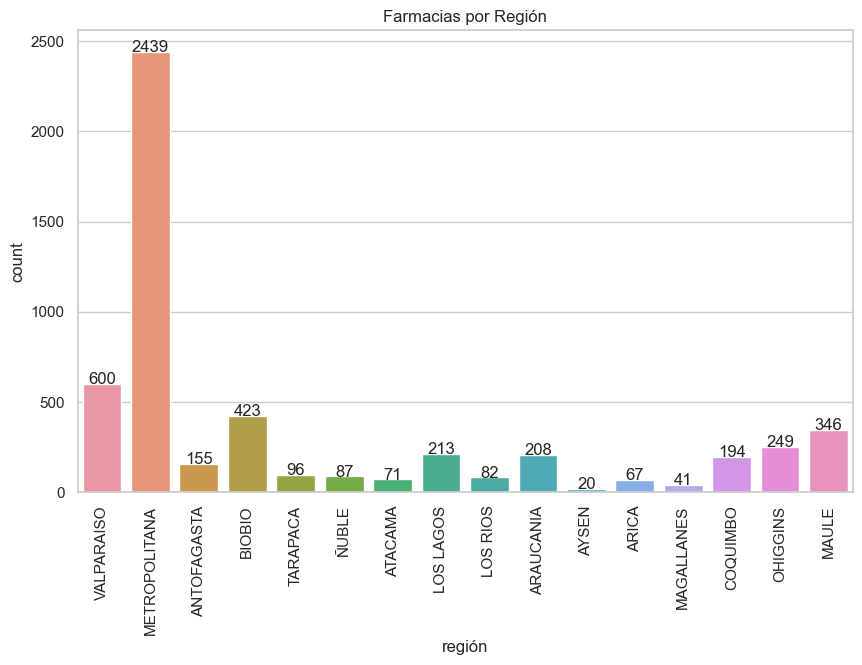

In [229]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_farmacias, x="región")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.title(f'Farmacias por Región')
plt.xticks(rotation=90)
plt.show()

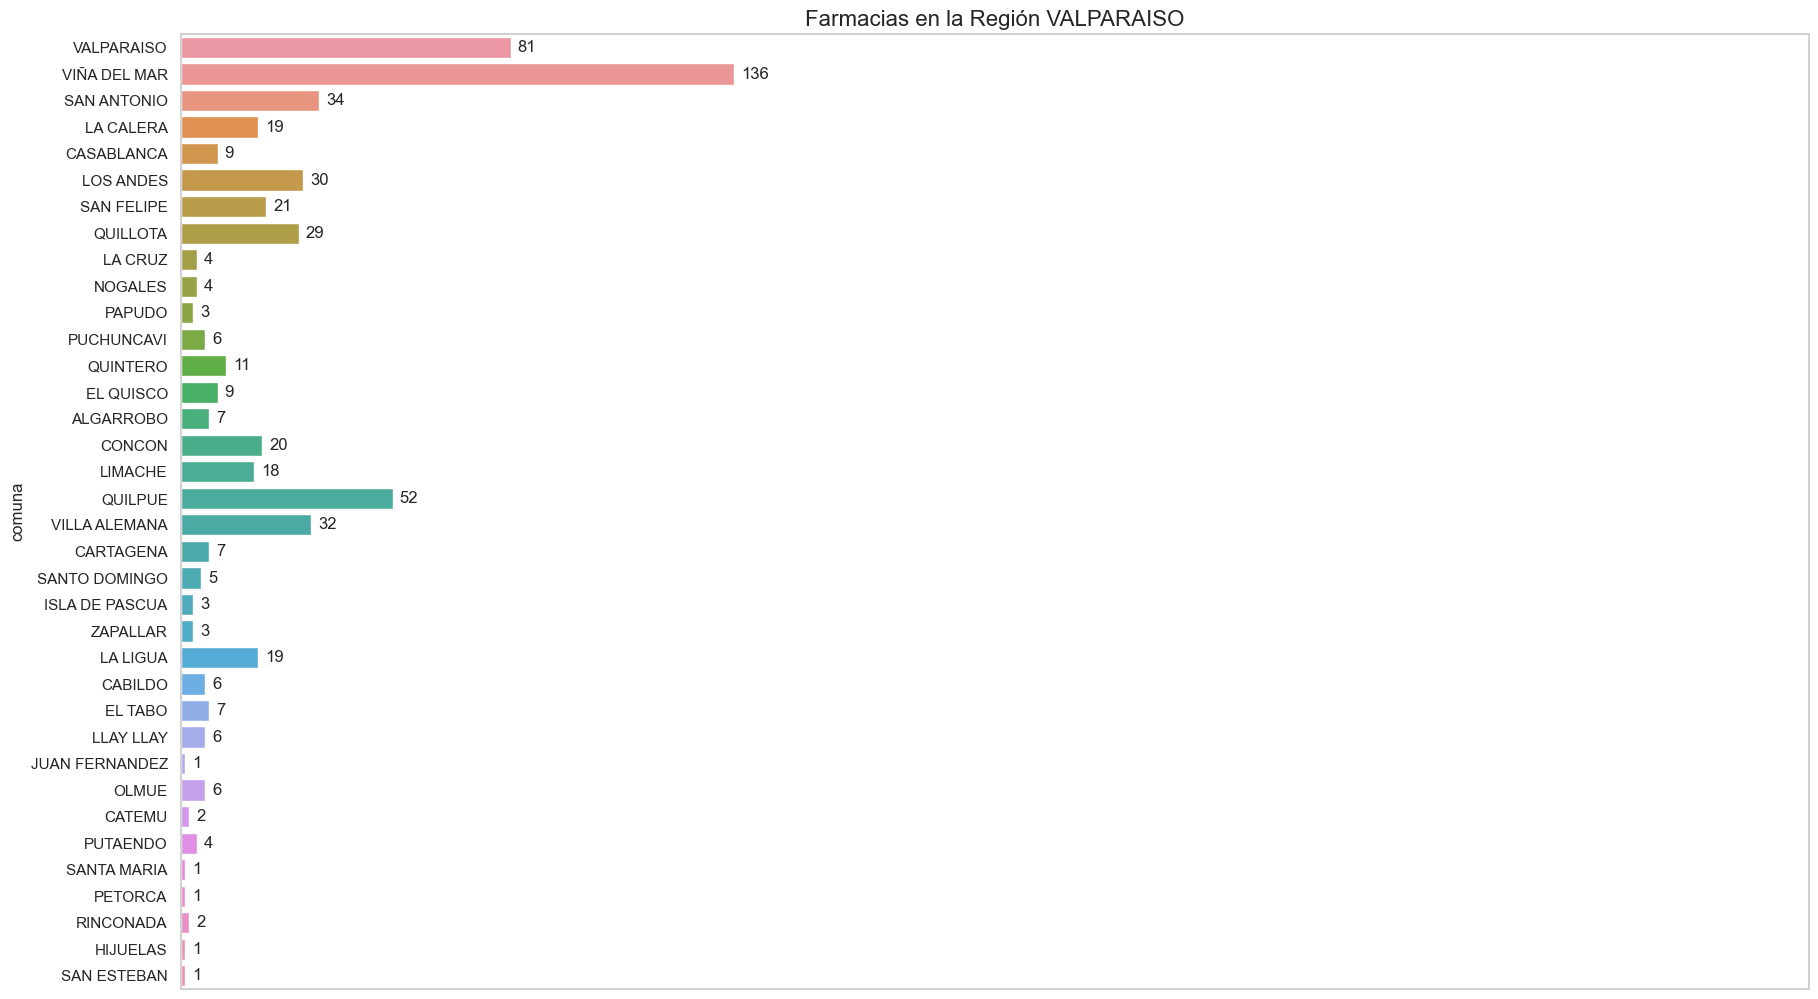

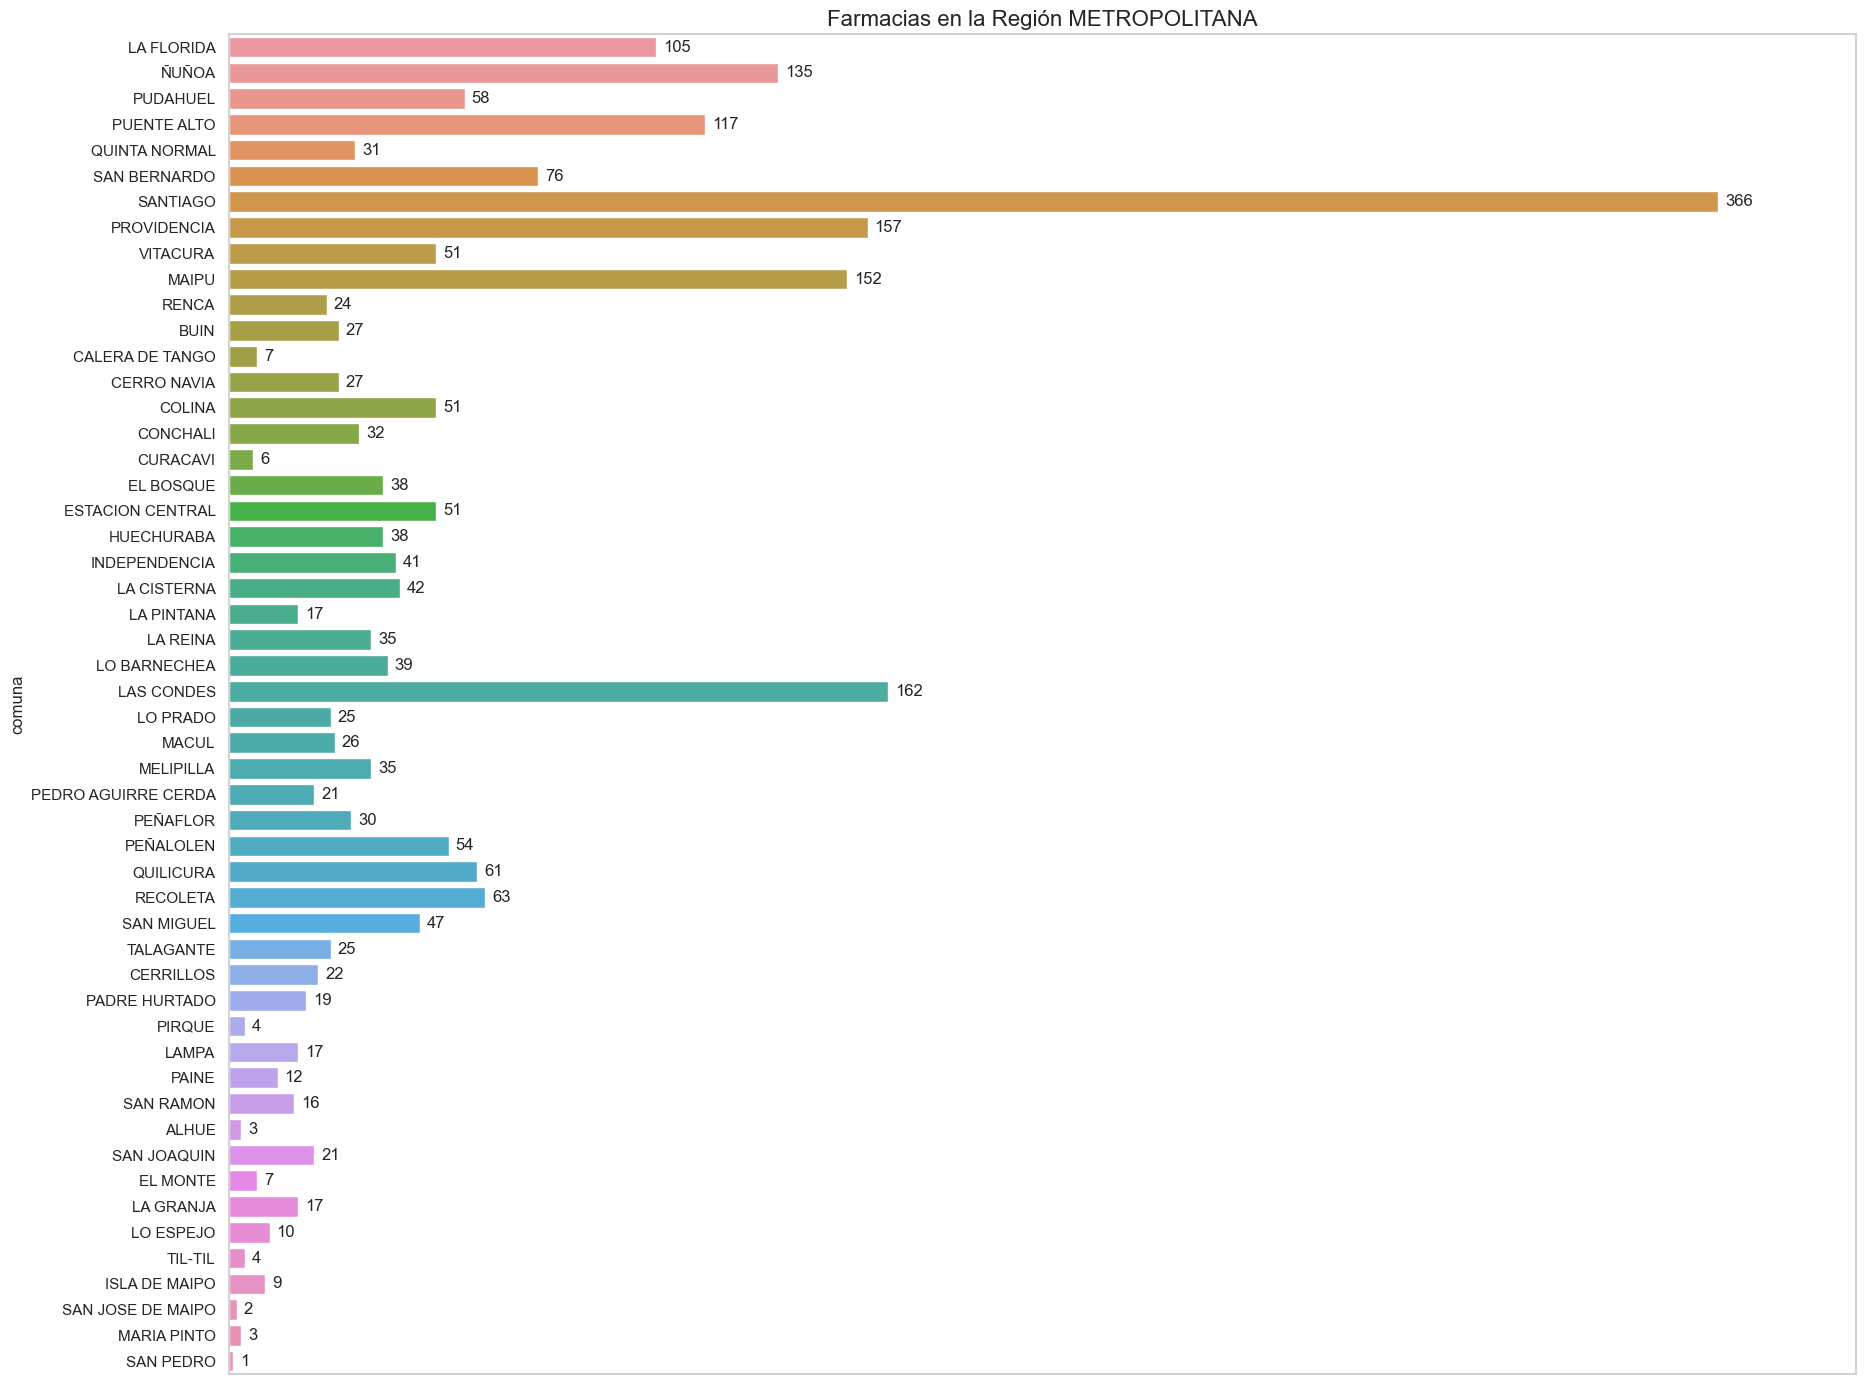

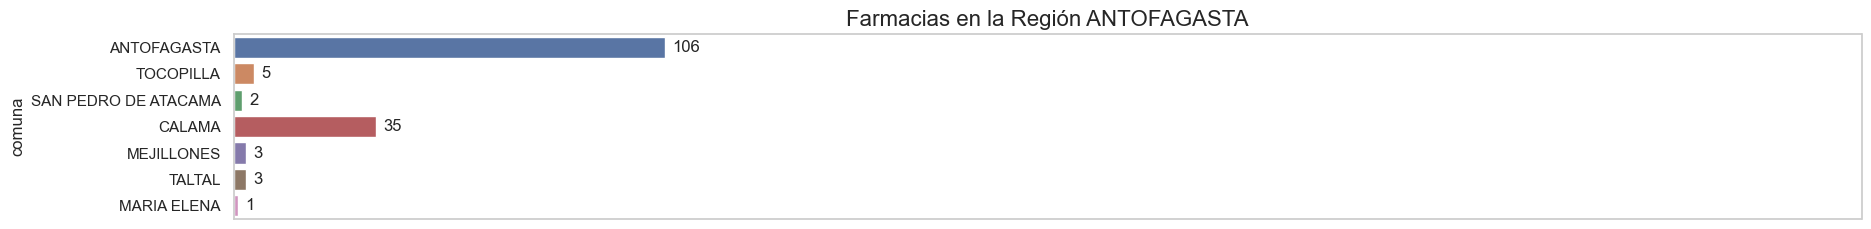

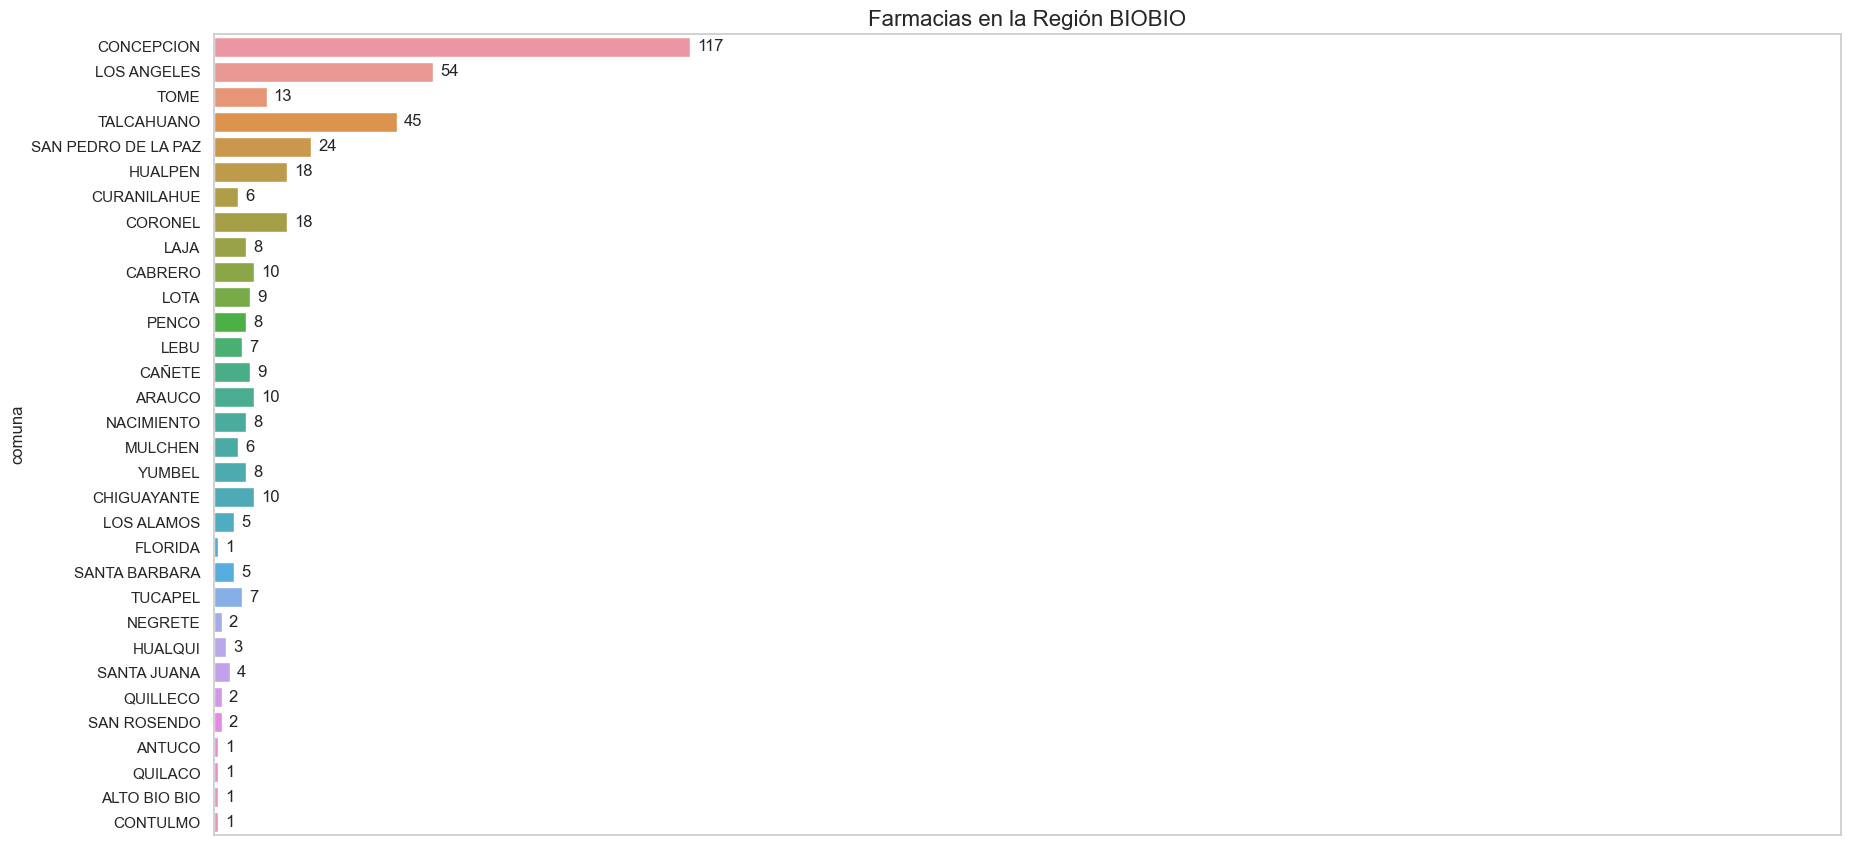

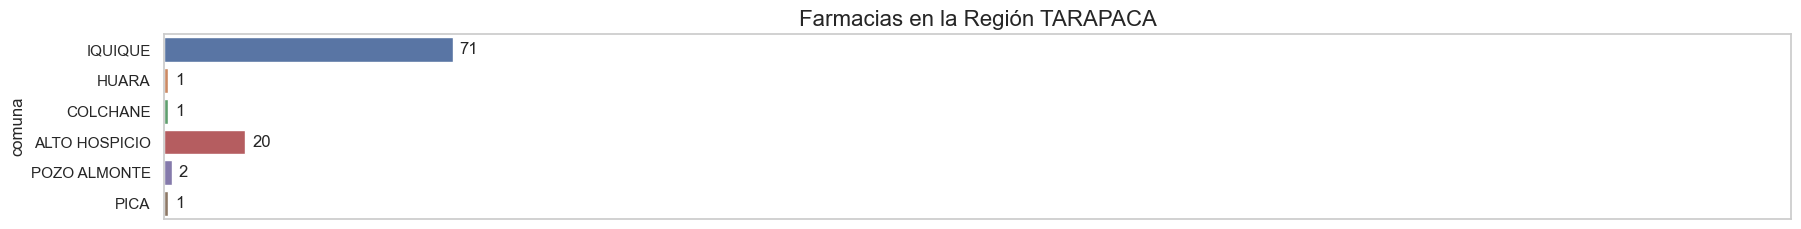

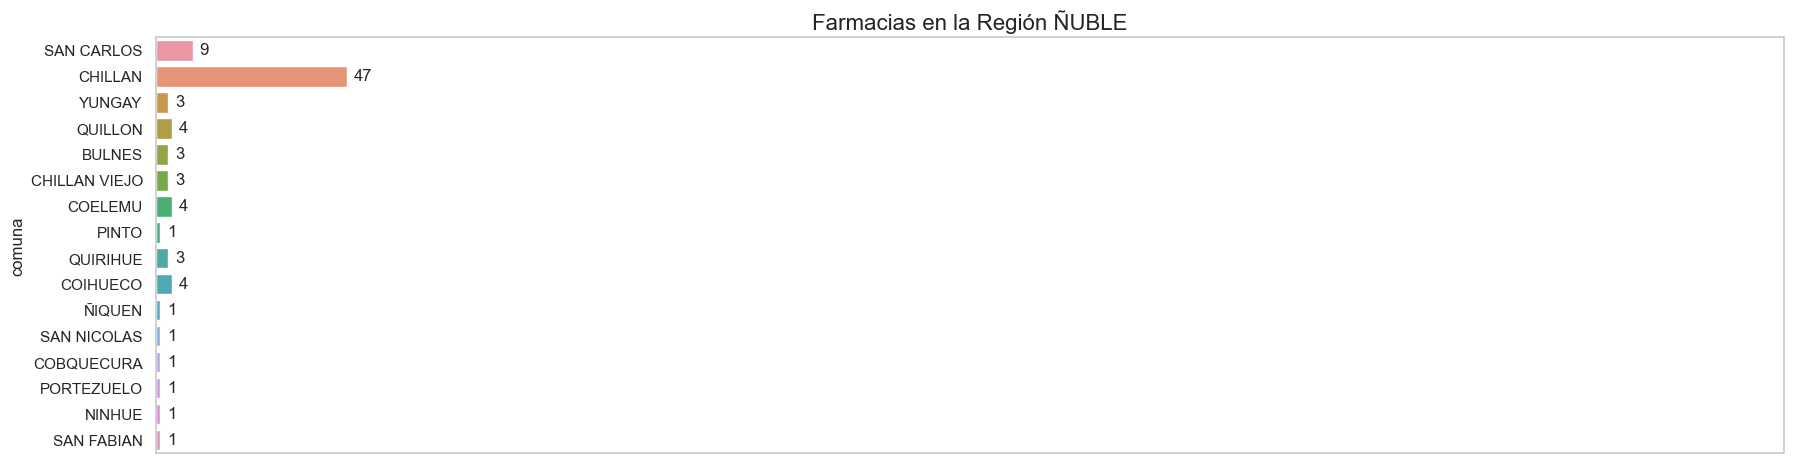

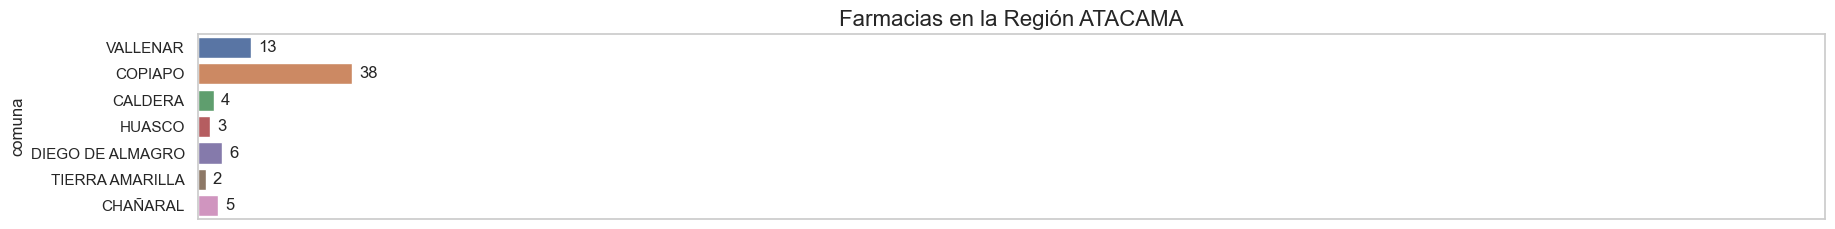

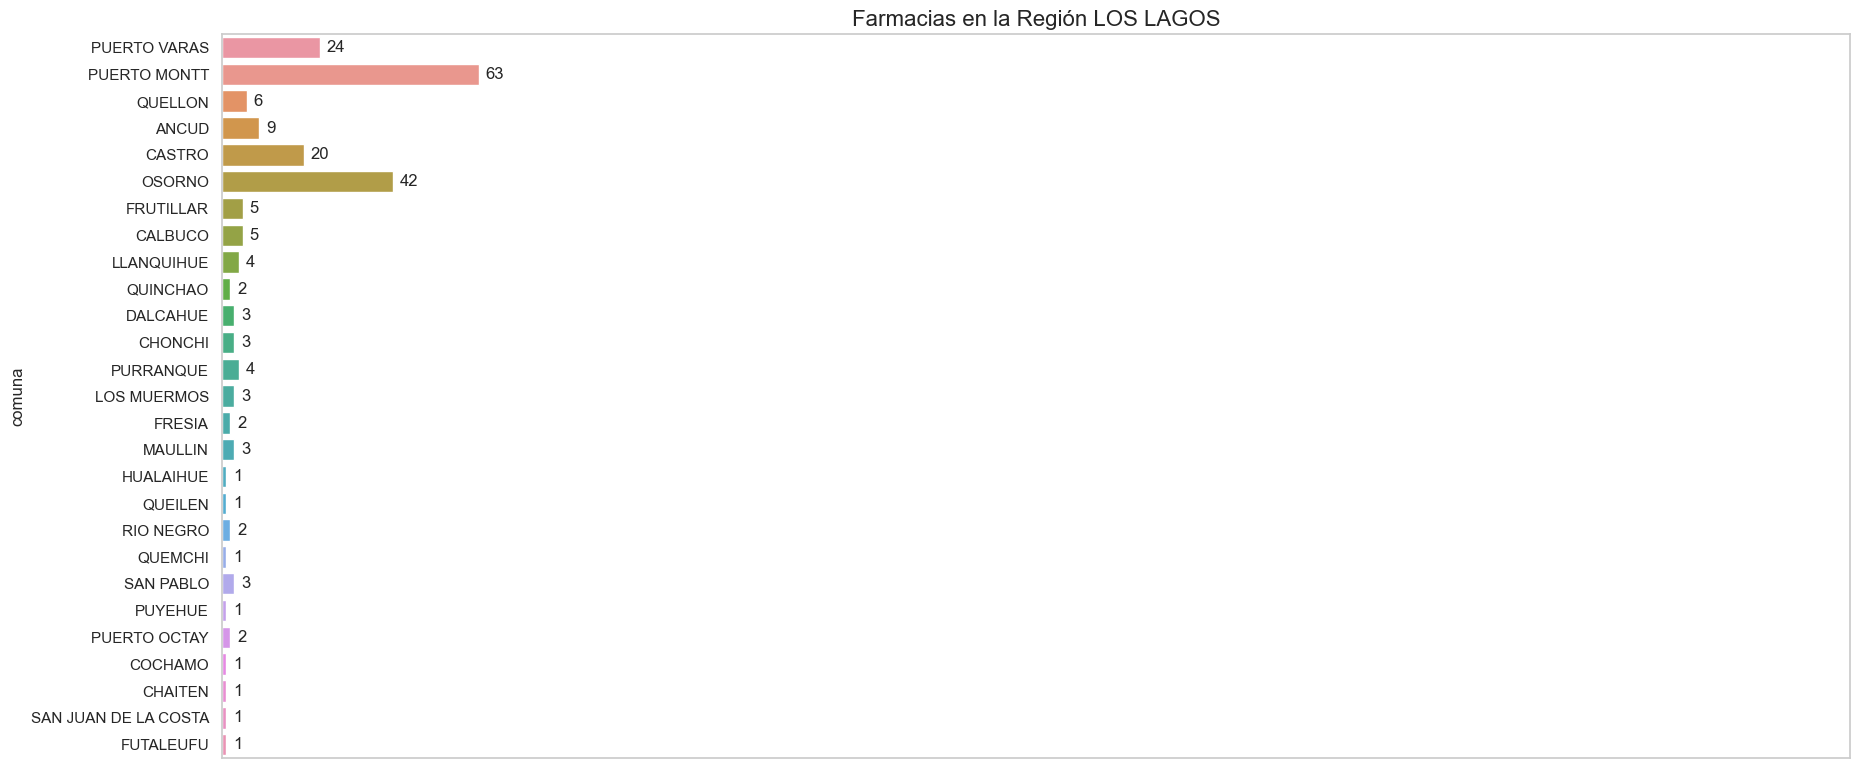

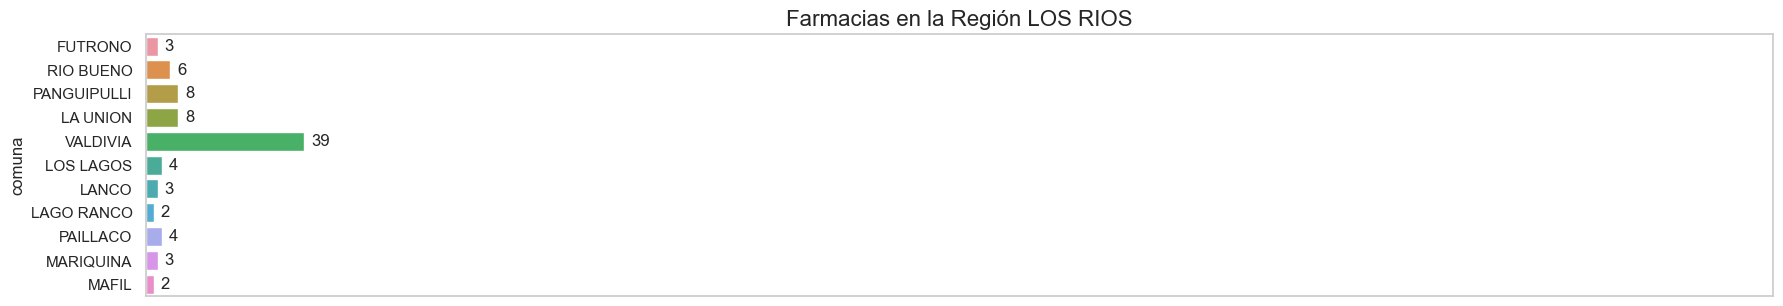

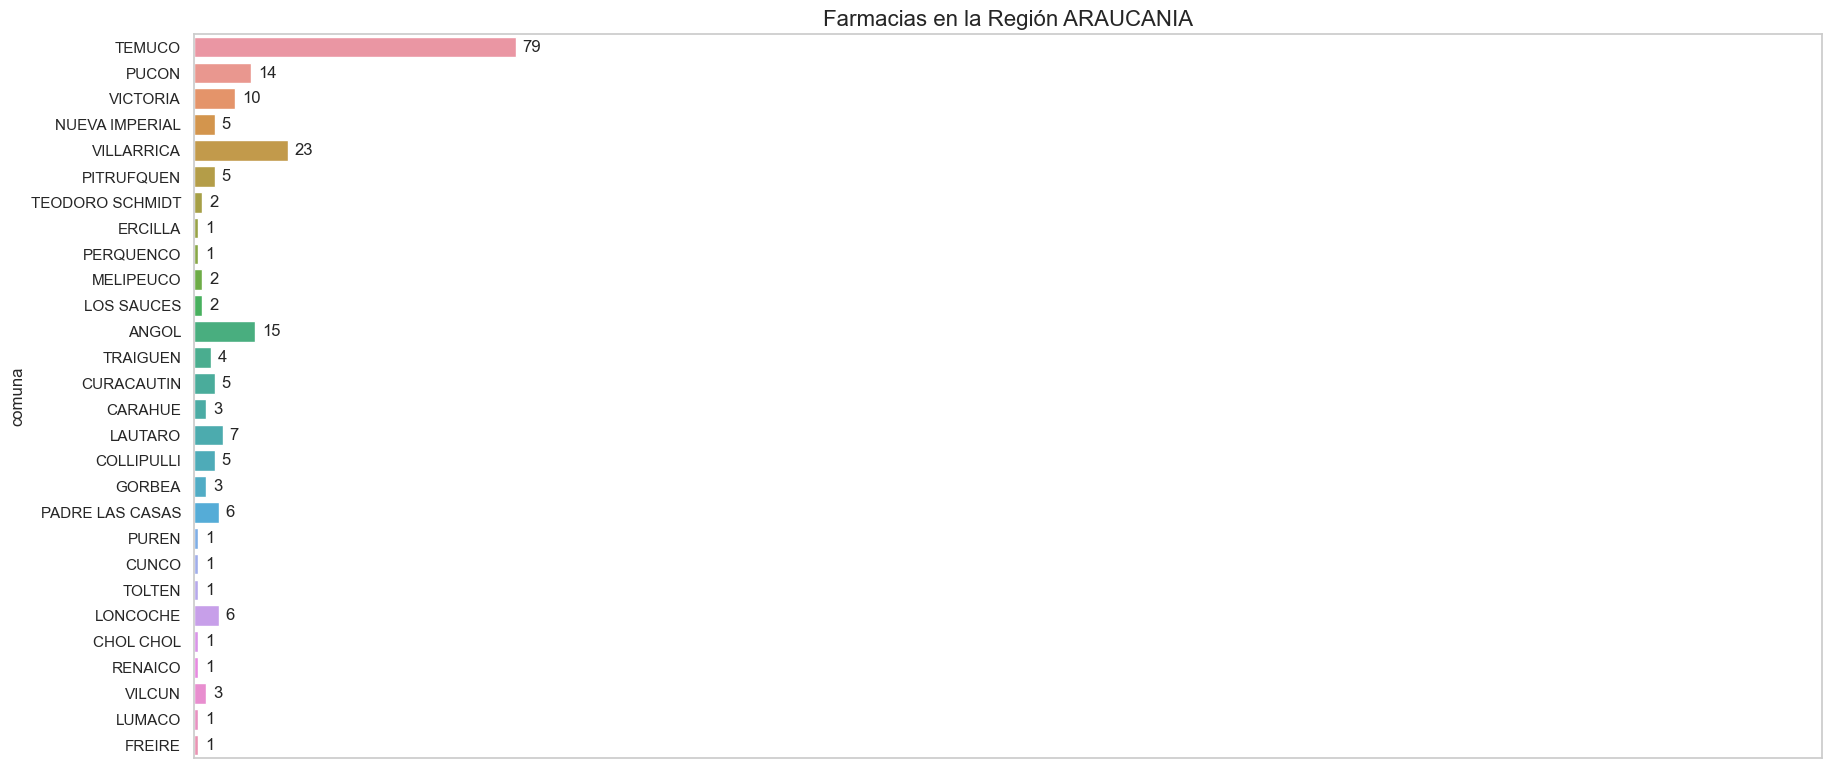

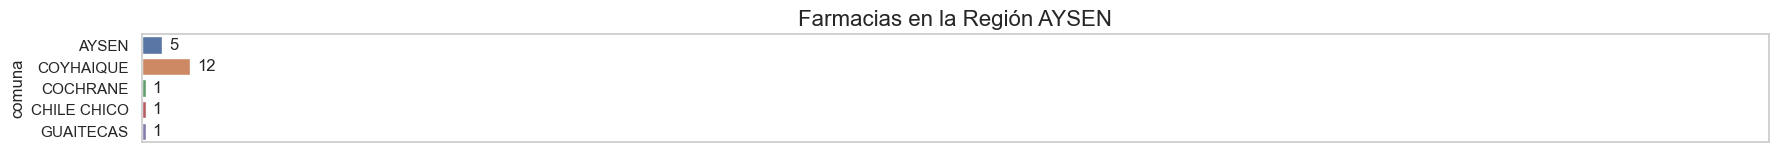

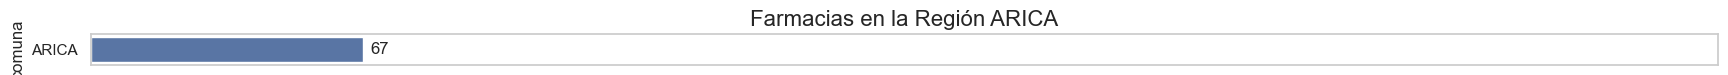

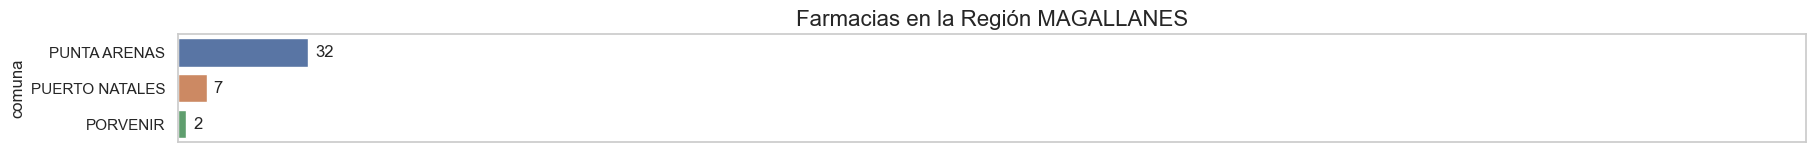

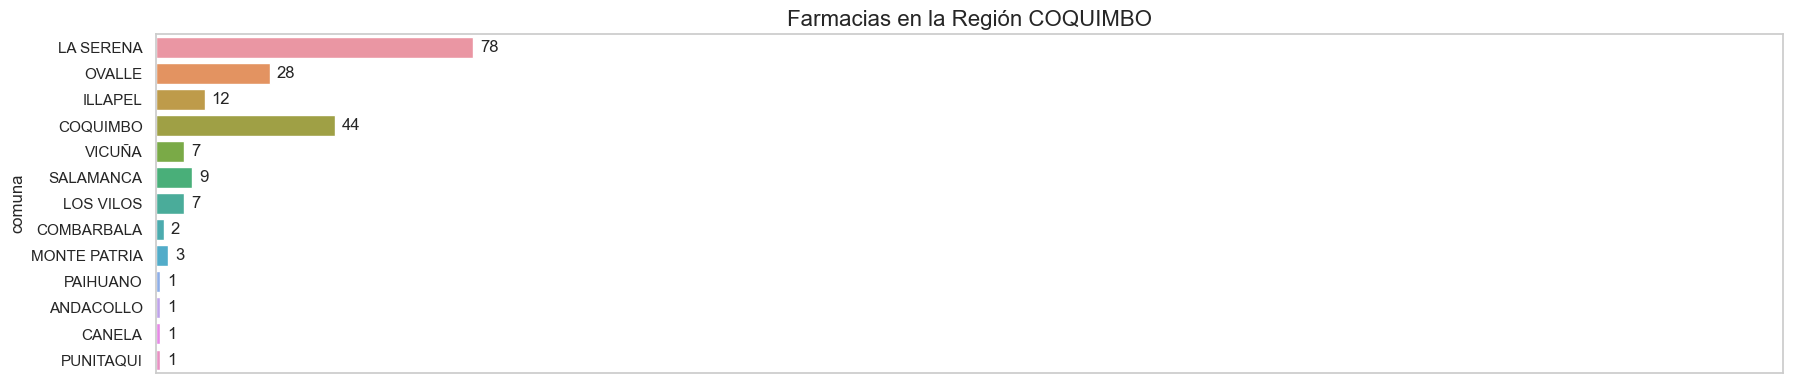

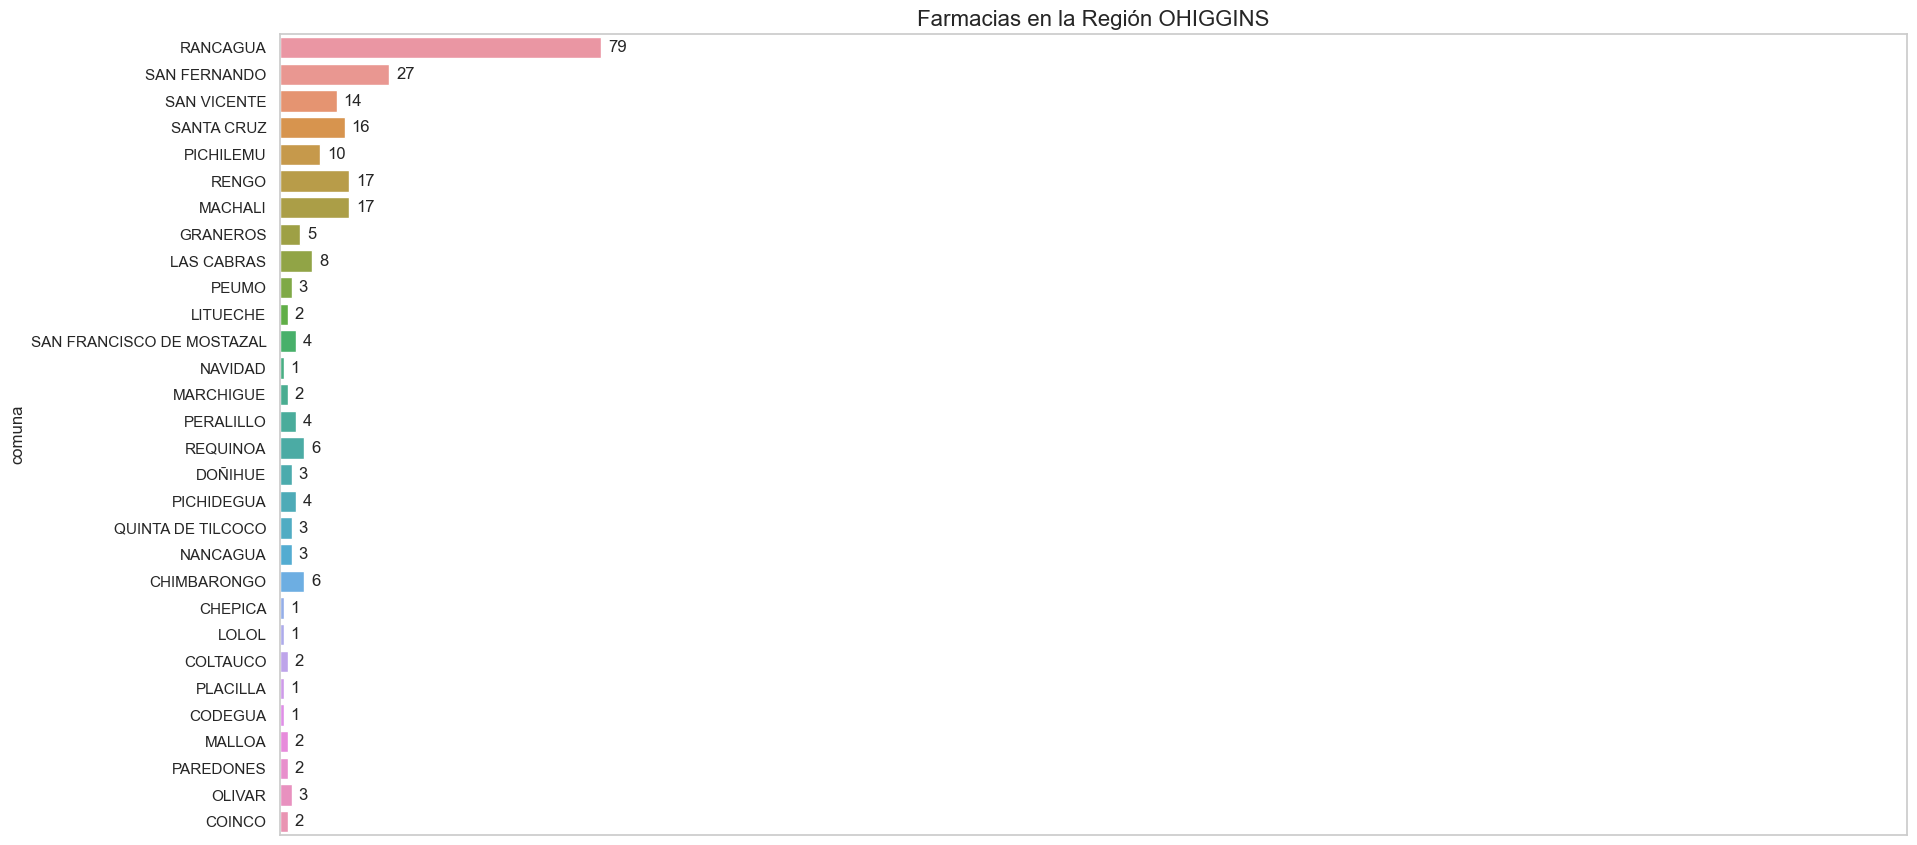

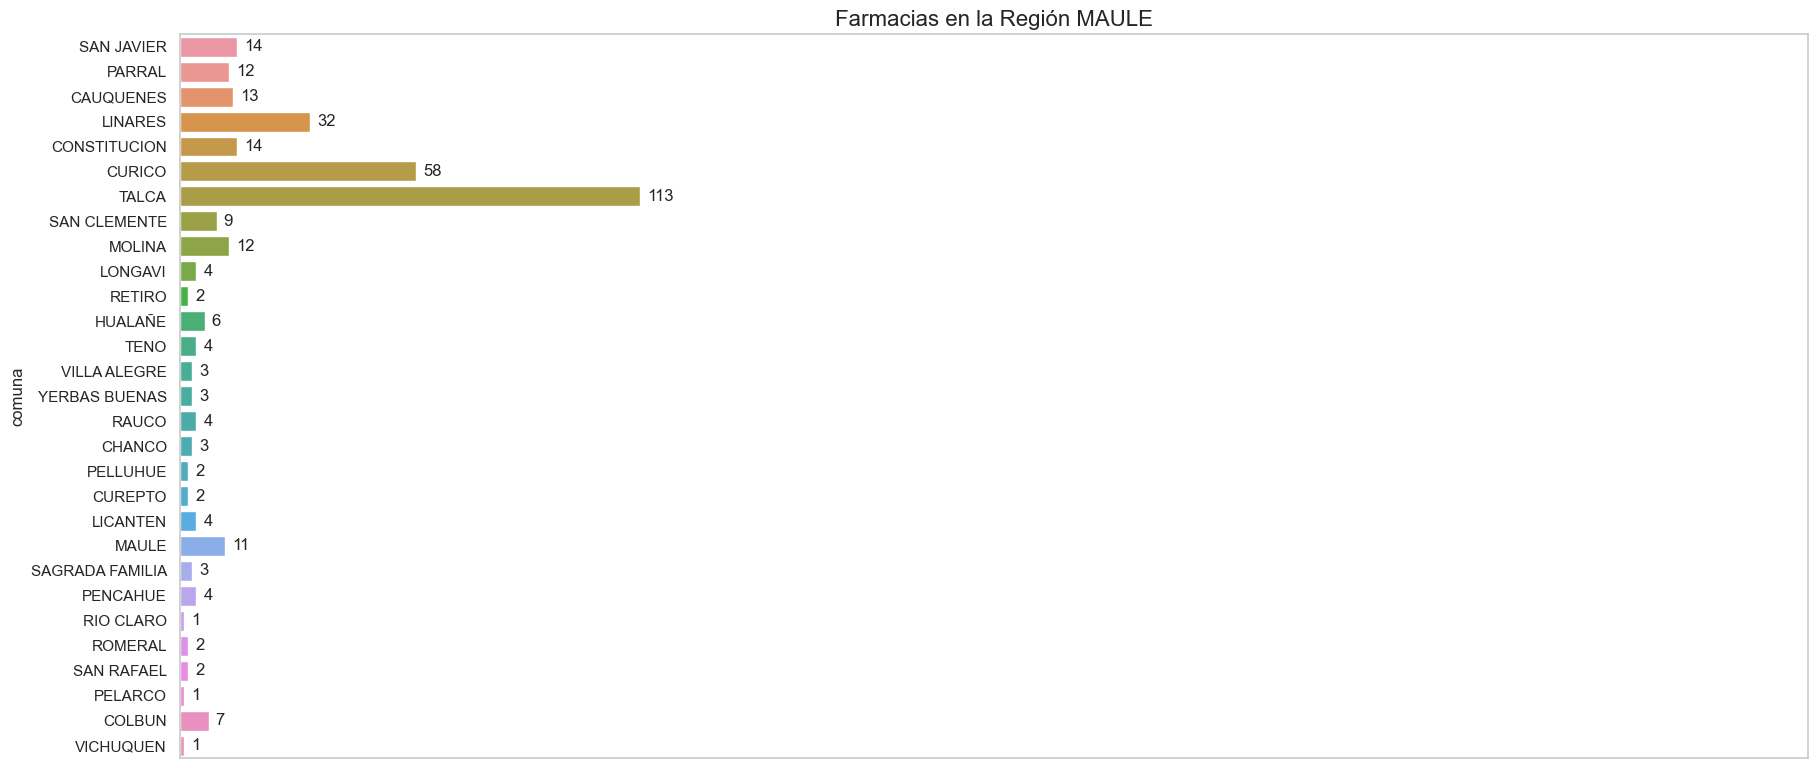

In [230]:
#warnings.resetwarnings()

regiones_unicas = df_farmacias['región'].unique()

# Itera a través de las regiones y crea un gráfico para cada una
for region in regiones_unicas:
    plt.figure(figsize=(21, 0.4 + len(df_farmacias[df_farmacias["región"] == region]["comuna"].unique()) // 3))
    ax = sns.countplot(data=df_farmacias[df_farmacias['región'] == region], y="comuna")

    # Anotar el número de farmacias al final de cada barra
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha='left', va='center', xytext=(5, 0), textcoords='offset points')

    plt.title(f'Farmacias en la Región {region}', fontsize=16)
    #plt.xticks(rotation=90)

    # Establecer límites del eje x
    plt.xlim(0, 400)

    # Ocultar el eje x y las etiquetas
    ax.xaxis.set_visible(False)

    plt.show()

In [213]:
df_correlacion = df_farmacias[["comuna","tipo"]]
df_correlacion = df_correlacion.groupby(["comuna"]).size().reset_index(name='num_farmacias')

corre = df_censo[["nombre_comuna","total"]].groupby("nombre_comuna").sum().reset_index()
df_correlacion = df_correlacion.merge(corre, left_on="comuna", right_on="nombre_comuna", how="right")
df_correlacion = df_correlacion.drop("comuna", axis=1)

df_correlacion['num_farmacias'] = df_correlacion['num_farmacias'].fillna(0).astype("int")
df_correlacion = df_correlacion.sort_values(by="num_farmacias", ignore_index=True)
df_correlacion = df_correlacion[df_correlacion['nombre_comuna'] != 'PAÍS']

df_correlacion

,num_farmacias,nombre_comuna,total
0,0,RÁNQUIL,11510
1,0,LA ESTRELLA,6082
2,0,TILTIL,38624
3,0,LA HIGUERA,8482
4,0,SIERRA GORDA,20372
...,...,...,...
342,135,ÑUÑOA,416474
343,136,VIÑA DEL MAR,668496
344,157,PROVIDENCIA,284158
345,162,LAS CONDES,589676


Text(0.5, 1.0, 'Relación entre Cantidad de Farmacias y Población por Comuna')

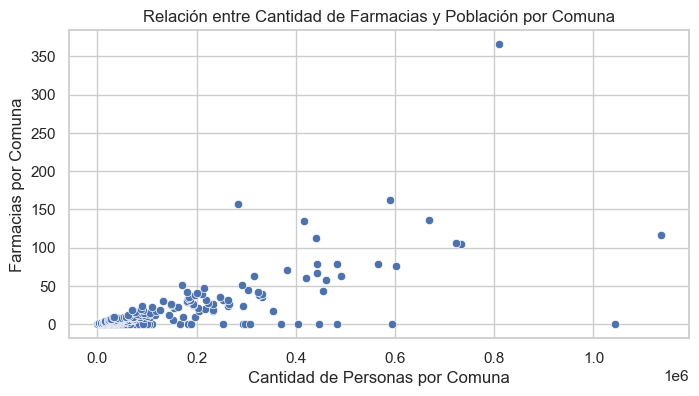

In [214]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.scatterplot(df_correlacion, y="num_farmacias", x="total")#, hue="región", palette="Spectral")

ax.set_ylabel("Farmacias por Comuna")
ax.set_xlabel("Cantidad de Personas por Comuna")
ax.set_title("Relación entre Cantidad de Farmacias y Población por Comuna")

In [216]:
df_correlacion.corr(numeric_only=True)["num_farmacias"].drop("num_farmacias")

total    0.709028
Name: num_farmacias, dtype: float64

In [217]:
df_correlacion[df_correlacion["num_farmacias"]==0] # no calza ;(

,num_farmacias,nombre_comuna,total
0,0,RÁNQUIL,11510
1,0,LA ESTRELLA,6082
2,0,TILTIL,38624
3,0,LA HIGUERA,8482
4,0,SIERRA GORDA,20372
...,...,...,...
111,0,TRAIGUÉN,37686
112,0,TREGUACO,10802
113,0,CURACAUTÍN,34826
114,0,CURACAVÍ,65158


In [224]:
len(df_censo["nombre_comuna"].unique())-1-len(df_farmacias["comuna"].unique())

43